# Aim
- Quick look at the multi variate data
- Perform necessary transformation, get the data ready for analytic

- Aim for multivariate data analytic is to find Linear relationship between multiple variate and the target value, and explain in what percentage certain variable is affecting the target value?
- Why linear relationship? Because it is most explainable and straight forward, making more sense to business owners. 

In [1]:
# To call functions outside of this folder
import sys  
sys.path.insert(0, '..')

In [2]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf

import seaborn as sns

import matplotlib.pyplot as plt

from src.analytics.ts_analytics import Ts_Analytics

analytics = Ts_Analytics()

---
# Load Data

In [3]:
ts = pd.read_excel('../data/multivariate/Predicting_price_blow_mold.xlsx')

---
# What is the date range of the data?

In [4]:
start = pd.to_datetime(ts['Date']).iloc[0]
end = pd.to_datetime(ts['Date']).iloc[-1]

full_date_range = pd.date_range(start=start, end=end, freq='MS')

print(f'- Data contains date from {start} to {end}')

print('-',all(full_date_range == pd.to_datetime(ts['Date'])), 
      f'Data contains full date range between {start} and {end}')

- Data contains date from 2000-01-01 00:00:00 to 2022-12-01 00:00:00
- True Data contains full date range between 2000-01-01 00:00:00 and 2022-12-01 00:00:00


---
# What is the target column? 
- 'Domestic Market (Contract) Blow Molding, Low' is the target column, based on the instruction

In [5]:
target_column = 'Domestic Market (Contract) Blow Molding, Low'
print(f'- Rename the target column {target_column} to y')
ts = ts.rename(columns={target_column:'y'})

print('- Rename datetime column and set as index')
ts.index = ts['Date']
ts.index = pd.to_datetime(ts.index)
ts = ts.drop(columns='Date')

ts = ts.sort_index()

- Rename the target column Domestic Market (Contract) Blow Molding, Low to y
- Rename datetime column and set as index


---
# Sort columns name in correlation strong to wake order

In [6]:
ts = ts[ts.corr(numeric_only=True)['y'].sort_values(ascending=False).index]

---
# What are the ratio of missing columns?

/var/folders/bq/df5l25m5389gxcql8x_kd8zc0000gn/T/ipykernel_54914/790754012.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


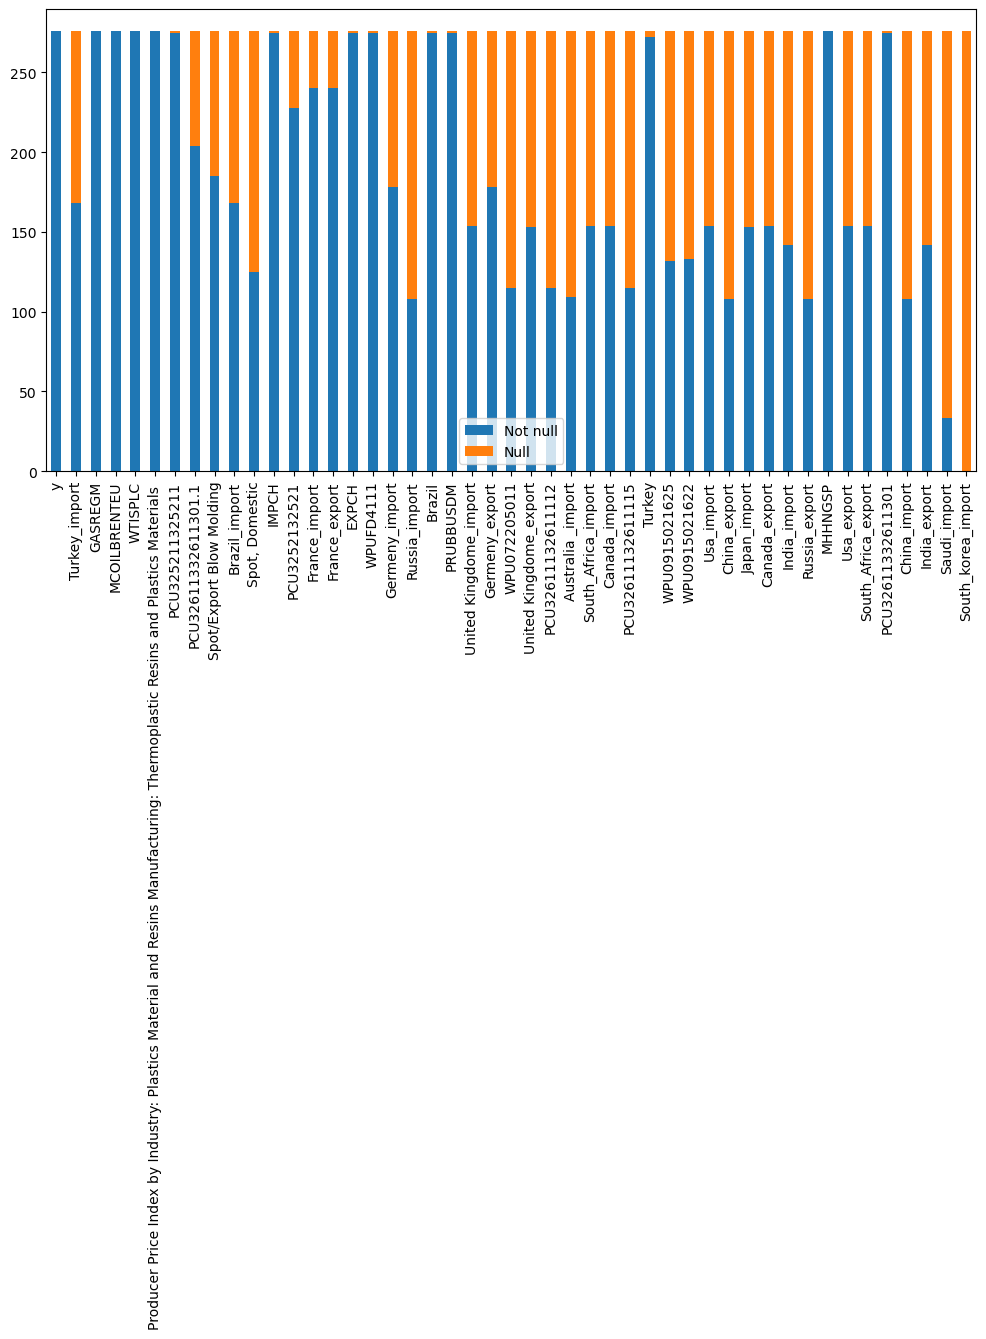

In [7]:
fig,ax = plt.subplots(figsize=(12,6))
pd.concat([ts.notna().sum(), ts.isna().sum()], axis=1).plot(kind='bar', stacked=True, legend=['Null','Not Null'], ax=ax)

fig.tight_layout()
ax.legend(labels=['Not null', 'Null'])

---
# Which columns are top correlated with target column?

In [8]:
print('Top 5 columns that are highly correlated with target column')
ts.corr(numeric_only=True)['y'].sort_values(ascending=False)[1:6]


Top 5 columns that are highly correlated with target column


Turkey_import                                                                                                                 0.906855
GASREGM                                                                                                                       0.902080
MCOILBRENTEU                                                                                                                  0.881459
WTISPLC                                                                                                                       0.880024
Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials     0.865644
Name: y, dtype: float64

## For testing purpose, focus on the 3 top correlated target column, and 2 middle range correlation first

In [9]:
zoom_in_columns = {
    'y':'y',
    'GASREGM':'gas_regm', 
    'MCOILBRENTEU':'m_coil_brent_eu', 
    'Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ':'ppi_plastic_resins', 
    'PRUBBUSDM':'global_proce_of_rubber',
    'PCU32611332611301':'ppi_nonpackaging_plastic'}

ts = ts[zoom_in_columns.keys()]
ts = ts.rename(columns=zoom_in_columns)

print('Rename zoomin columns so it is easier to understand')
analytics.analyse(ts)

Rename zoomin columns so it is easier to understand


---
# What is the autocorrelation of the target column

In [10]:
# analytics.log_transform()

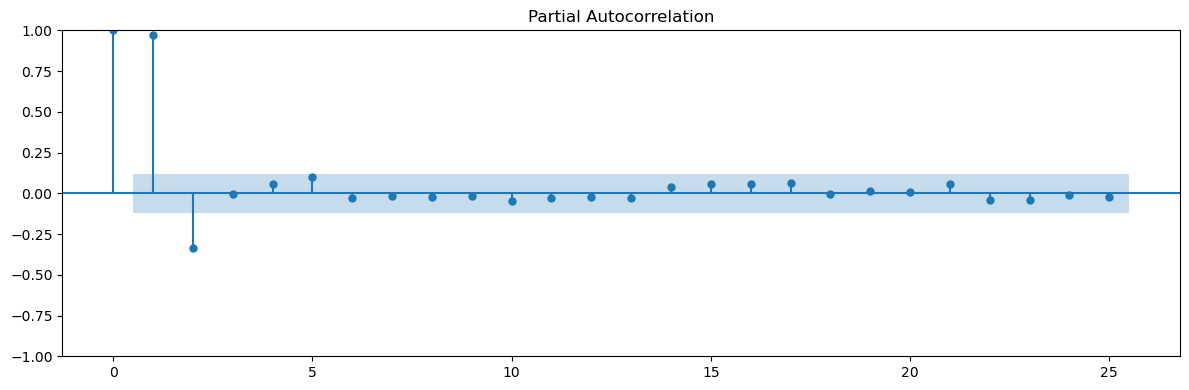

In [11]:
analytics.plot_target_pacf()
plt.show()

In [12]:
print('Set the correlation for target column')
analytics.set_ar('y', 2)

Set the correlation for target column


In [13]:
analytics.create_target_lag_columns()

create_target_lag_columns
create_lag_dfs y 2
drop all null values


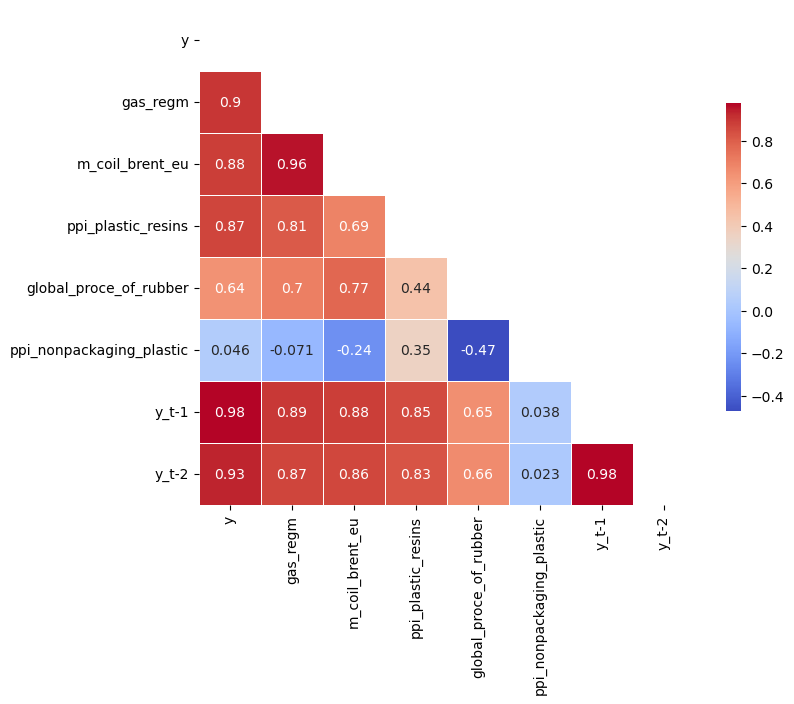

In [14]:
analytics.plot_correlation()
plt.show()

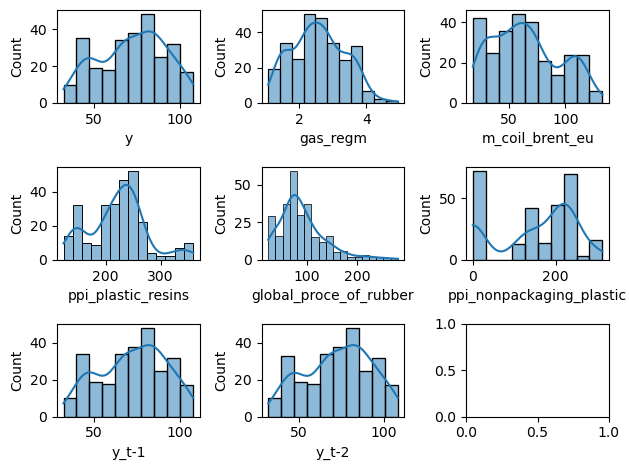

In [15]:
analytics.plot_distributions()

plt.show()

In [16]:
analytics.ts_df

y  gas_regm  m_coil_brent_eu  ppi_plastic_resins  \
Date                                                              
2000-01-01  41.0     1.289            25.51             139.400   
2000-02-01  41.0     1.377            27.78             141.700   
2000-03-01  45.0     1.516            27.49             146.300   
2000-04-01  47.0     1.465            22.76             151.400   
2000-05-01  47.0     1.487            27.74             155.600   
...          ...       ...              ...                 ...   
2022-08-01  93.0     3.975           100.45             329.278   
2022-09-01  90.0     3.700            89.76             326.451   
2022-10-01  90.0     3.815            93.33             316.901   
2022-11-01  90.0     3.685            91.42             300.185   
2022-12-01  90.0     3.210            80.92             291.825   

            global_proce_of_rubber  ppi_nonpackaging_plastic  y_t-1  y_t-2  
Date                                                                        
2000-01-01               29.207387                   106.300   41.0   45.0  
2000-02-01               33.391099                   105.600   45.0   47.0  
2000-03-01               30.941913                   106.100   47.0   47.0  
2000-04-01               31.930148                   106.900   47.0   47.0  
2000-05-01               31.201702                   106.300   47.0   47.0  
...                            ...                       ...    ...    ...  
2022-08-01               73.304558                   303.837   90.0   90.0  
2022-09-01               66.956499                   308.976   90.0   90.0  
2022-10-01               68.535729                   312.788   90.0   90.0  
2022-11-01               65.265834                   307.226   90.0    NaN  
2022-12-01                     NaN                       NaN    NaN    NaN  

[276 rows x 8 columns]

---

# Full null values

In [21]:
ts.ffill(inplace=True)

---

# Save data

In [19]:
ts['datetime'] = ts.index
ts.to_csv('../data/multivariate/blow_mold_preprocessed.csv', index=False)